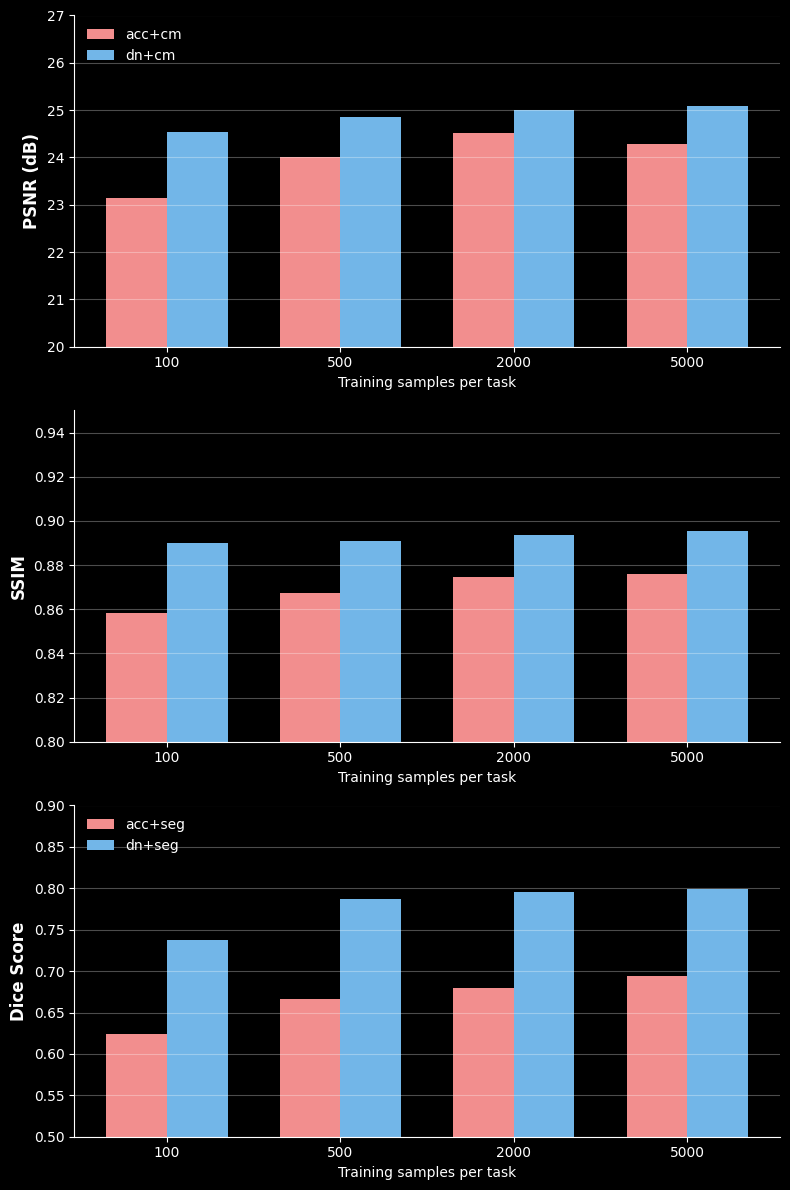

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 설정 (제공된 테이블 수치 기반)
labels = ['100', '500', '2000', '5000']
x = np.arange(len(labels))  # x축 위치
width = 0.35  # 막대 너비

# Metric 데이터
# acc+cm vs dn+cm 비교 (PSNR, SSIM)
psnr_acc = [23.15, 24.02, 24.52, 24.28]
psnr_dn = [24.53, 24.85, 25.01, 25.09]

ssim_acc = [0.8585, 0.8675, 0.8747, 0.8759]
ssim_dn = [0.8898, 0.8911, 0.8934, 0.8956]

# acc+seg vs dn+seg 비교 (Dice)
dice_acc = [0.6244, 0.6662, 0.6793, 0.6940]
dice_dn = [0.7380, 0.7869, 0.7952, 0.7996]

# 2. 스타일 설정
plt.style.use('dark_background')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
colors = ['#f28e8e', '#72b6e8'] # 첫 번째 이미지의 핑크, 블루 계열 색상 참고

def format_plot(ax, ylabel, title=None):
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Training samples per task', fontsize=10)
    ax.grid(axis='y', linestyle='-', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if title:
        ax.set_title(title, loc='left', pad=10)

# 3. 각 그래프 그리기
# Plot 1: PSNR
ax1.bar(x - width/2, psnr_acc, width, label='acc+cm', color=colors[0])
ax1.bar(x + width/2, psnr_dn, width, label='dn+cm', color=colors[1])
format_plot(ax1, 'PSNR (dB)')
ax1.set_ylim(20, 27) # 데이터 범위에 맞게 조정
ax1.legend(loc='upper left', frameon=False)

# Plot 2: SSIM
ax2.bar(x - width/2, ssim_acc, width, label='acc+cm', color=colors[0])
ax2.bar(x + width/2, ssim_dn, width, label='dn+cm', color=colors[1])
format_plot(ax2, 'SSIM')
ax2.set_ylim(0.8, 0.95)

# Plot 3: Dice Score
ax3.bar(x - width/2, dice_acc, width, label='acc+seg', color=colors[0])
ax3.bar(x + width/2, dice_dn, width, label='dn+seg', color=colors[1])
format_plot(ax3, 'Dice Score')
ax3.set_ylim(0.5, 0.9)
ax3.legend(loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

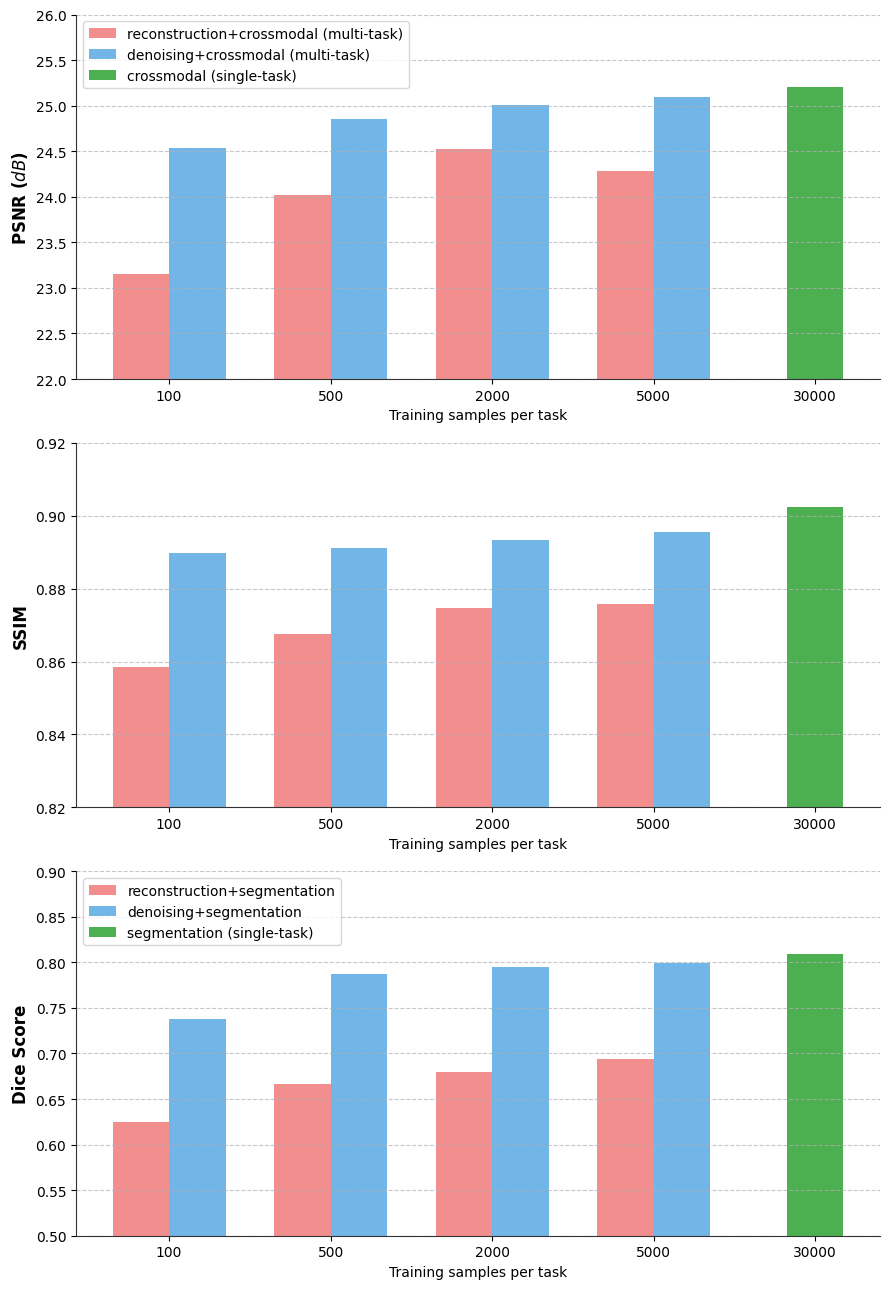

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 설정
# 기존 데이터 + 30000 카테고리 추가
labels = ['100', '500', '2000', '5000', '30000']
x = np.arange(len(labels))
width = 0.35

# Metric 데이터 (image_0f893e.png의 cm psnr, cm ssim, seg dice 반영)
# PSNR 데이터: 30000 위치에는 cm psnr(25.20) 배치
psnr_acc = [23.15, 24.02, 24.52, 24.28, 0] # 30000은 별도 처리 위해 0
psnr_dn  = [24.53, 24.85, 25.01, 25.09, 0]
psnr_30k = 25.20 

# SSIM 데이터: 30000 위치에는 cm ssim(0.9024) 배치
ssim_acc = [0.8585, 0.8675, 0.8747, 0.8759, 0]
ssim_dn  = [0.8898, 0.8911, 0.8934, 0.8956, 0]
ssim_30k = 0.9024

# Dice 데이터: 30000 위치에는 seg dice(0.8087) 배치
dice_acc = [0.6244, 0.6662, 0.6793, 0.6940, 0]
dice_dn  = [0.7380, 0.7869, 0.7952, 0.7996, 0]
dice_30k = 0.8087

# 2. 스타일 설정 (배경 흰색)
plt.rcParams.update(plt.rcParamsDefault) # 기본 스타일 리셋
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 13), facecolor='white')

# 색상 설정: 핑크, 블루, 그리고 30000을 위한 그린
colors = ['#f28e8e', '#72b6e8', '#4CAF50'] 

def format_plot(ax, ylabel):
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold', color='black')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, color='black')
    ax.set_xlabel('Training samples per task', fontsize=10, color='black')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_facecolor('white')
    # 테두리 설정
    for spine in ax.spines.values():
        spine.set_edgecolor('#333333')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# 3. 각 그래프 그리기
# Plot 1: PSNR
ax1.bar(x[:-1] - width/2, psnr_acc[:-1], width, label='reconstruction+crossmodal (multi-task)', color=colors[0])
ax1.bar(x[:-1] + width/2, psnr_dn[:-1], width, label='denoising+crossmodal (multi-task)', color=colors[1])
ax1.bar(x[-1], psnr_30k, width, label='crossmodal (single-task)', color=colors[2])
format_plot(ax1, 'PSNR ($dB$)')
ax1.set_ylim(22, 26)
ax1.legend(loc='upper left', frameon=True)

# Plot 2: SSIM
ax2.bar(x[:-1] - width/2, ssim_acc[:-1], width, label='reconstruction+crossmodal (multi-task)', color=colors[0])
ax2.bar(x[:-1] + width/2, ssim_dn[:-1], width, label='denoising+crossmodal (multi-task)', color=colors[1])
ax2.bar(x[-1], ssim_30k, width, label='crossmodal (single-task)', color=colors[2])
format_plot(ax2, 'SSIM')
ax2.set_ylim(0.82, 0.92)

# Plot 3: Dice Score
ax3.bar(x[:-1] - width/2, dice_acc[:-1], width, label='reconstruction+segmentation', color=colors[0])
ax3.bar(x[:-1] + width/2, dice_dn[:-1], width, label='denoising+segmentation', color=colors[1])
ax3.bar(x[-1], dice_30k, width, label='segmentation (single-task)', color=colors[2])
format_plot(ax3, 'Dice Score')
ax3.set_ylim(0.5, 0.9)
ax3.legend(loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

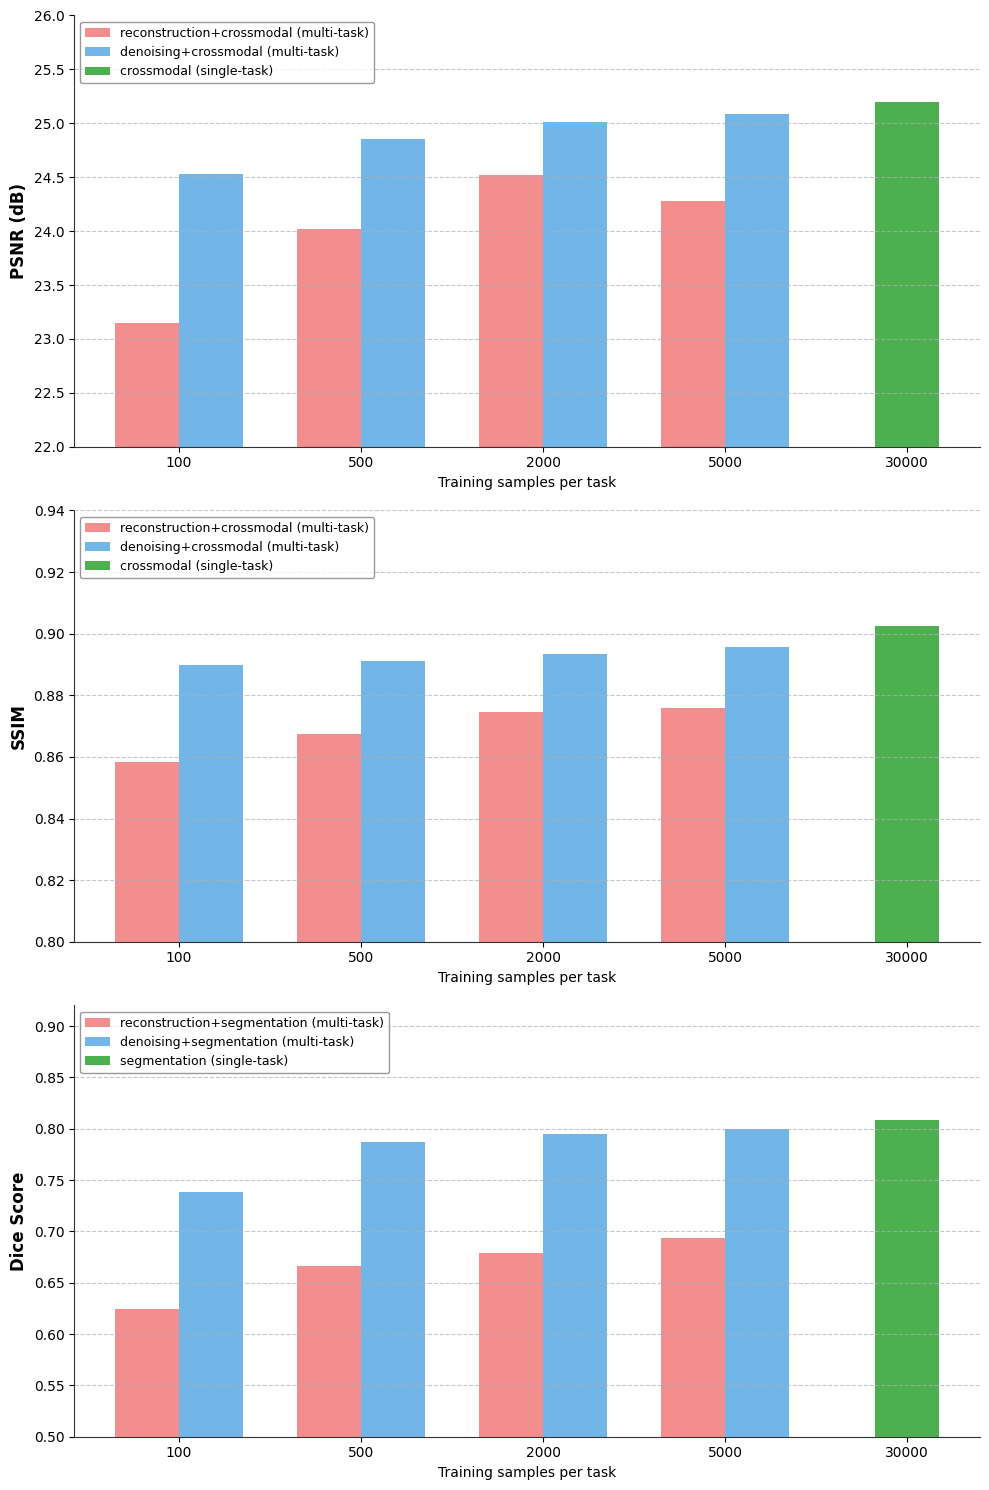

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 설정
labels = ['100', '500', '2000', '5000', '30000']
x = np.arange(len(labels))
width = 0.35

# PSNR 데이터 (30000 카테고리는 별도 변수로 관리)
psnr_acc = [23.15, 24.02, 24.52, 24.28]
psnr_dn  = [24.53, 24.85, 25.01, 25.09]
psnr_30k = 25.20 

# SSIM 데이터 (image_0f893e.png의 cm ssim: 0.9024 반영)
ssim_acc = [0.8585, 0.8675, 0.8747, 0.8759]
ssim_dn  = [0.8898, 0.8911, 0.8934, 0.8956]
ssim_30k = 0.9024

# Dice 데이터 (image_0f893e.png의 seg dice: 0.8087 반영)
dice_acc = [0.6244, 0.6662, 0.6793, 0.6940]
dice_dn  = [0.7380, 0.7869, 0.7952, 0.7996]
dice_30k = 0.8087

# 2. 스타일 설정 (배경 흰색)
plt.rcParams.update(plt.rcParamsDefault)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), facecolor='white')

colors = ['#f28e8e', '#72b6e8', '#4CAF50'] 

def format_plot(ax, ylabel, ylim):
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold', color='black')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, color='black')
    ax.set_xlabel('Training samples per task', fontsize=10, color='black')
    ax.set_ylim(ylim)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_facecolor('white')
    for spine in ax.spines.values():
        spine.set_edgecolor('#333333')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # 범례 설정을 함수 내부에 통합하여 모든 subplot에 강제 적용
    ax.legend(loc='upper left', frameon=True, fontsize=9, edgecolor='gray')

# 3. 각 그래프 그리기
# Plot 1: PSNR
ax1.bar(x[:-1] - width/2, psnr_acc, width, label='reconstruction+crossmodal (multi-task)', color=colors[0])
ax1.bar(x[:-1] + width/2, psnr_dn, width, label='denoising+crossmodal (multi-task)', color=colors[1])
ax1.bar(x[-1], psnr_30k, width, label='crossmodal (single-task)', color=colors[2])
format_plot(ax1, 'PSNR (dB)', (22, 26)) # 여유 공간 확보

# Plot 2: SSIM
ax2.bar(x[:-1] - width/2, ssim_acc, width, label='reconstruction+crossmodal (multi-task)', color=colors[0])
ax2.bar(x[:-1] + width/2, ssim_dn, width, label='denoising+crossmodal (multi-task)', color=colors[1])
ax2.bar(x[-1], ssim_30k, width, label='crossmodal (single-task)', color=colors[2])
format_plot(ax2, 'SSIM', (0.80, 0.94)) # 범례 공간 확보를 위해 상단 한도 상향

# Plot 3: Dice Score
ax3.bar(x[:-1] - width/2, dice_acc, width, label='reconstruction+segmentation (multi-task)', color=colors[0])
ax3.bar(x[:-1] + width/2, dice_dn, width, label='denoising+segmentation (multi-task)', color=colors[1])
ax3.bar(x[-1], dice_30k, width, label='segmentation (single-task)', color=colors[2])
format_plot(ax3, 'Dice Score', (0.5, 0.92))

plt.tight_layout()
plt.show()